# K-Means Clustering

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Importing the dataset

In [3]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3,4]].values


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
dataset.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df = pd.DataFrame(dataset)

In [8]:
print(X[:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


## Using the elbow method to find the optimal number of clusters

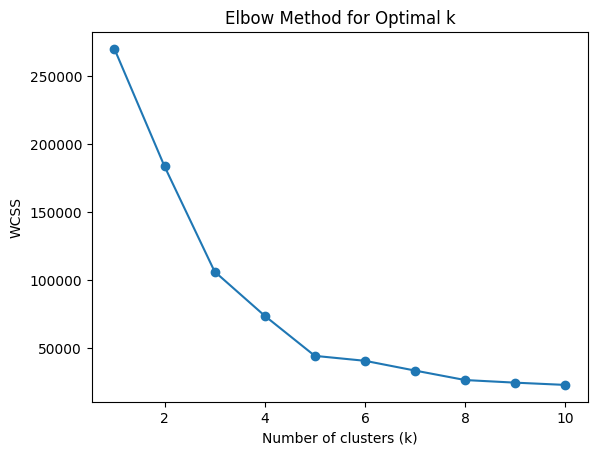

In [9]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init = "k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [10]:
kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)
labels = kmeans.labels_

In [11]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [12]:
print(X.shape)


(200, 2)


## Visualising the clusters





In [13]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


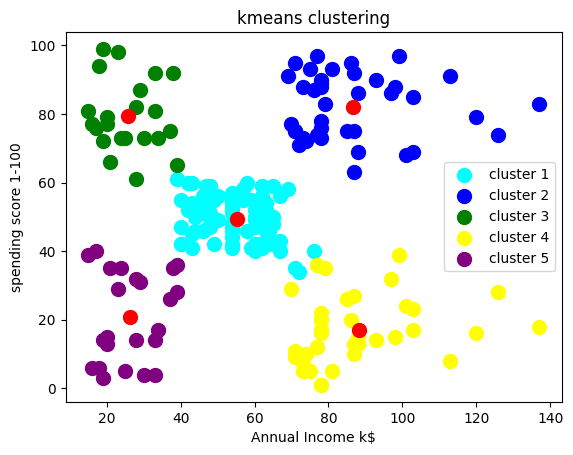

In [14]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0,1], s=100, color = 'cyan', label = "cluster 1")
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1,1], s=100, color = 'blue', label = "cluster 2")
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2,1], s=100, color = 'green', label = "cluster 3")
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3,1], s=100, color = 'yellow', label = "cluster 4")
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4,1], s=100, color = 'purple', label = "cluster 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, color = "red")
plt.title("kmeans clustering")
plt.xlabel("Annual Income k$")
# plt.xlabel("Age")

plt.ylabel("spending score 1-100")
plt.legend()

plt.show()

# Age & Spending score

## Creating X (column 2 and 4)

In [15]:
X = dataset.iloc[:, [2,4]].values


In [16]:
X[:10]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72]])

## Using the elbow method to find the optimal number of clusters

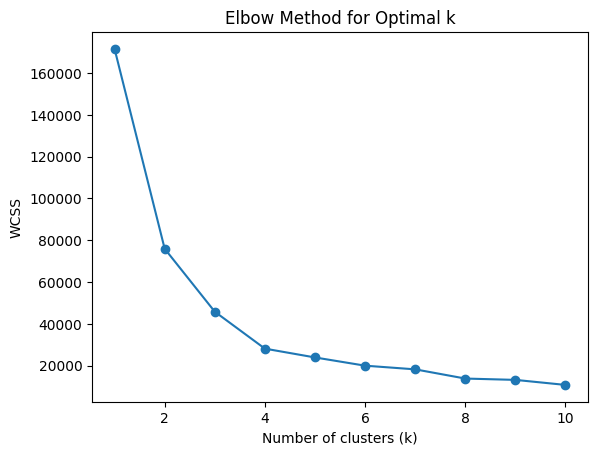

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init = "k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [18]:
kmeans2 = KMeans(n_clusters=4, init = "k-means++", random_state=42)
y_kmeans = kmeans2.fit_predict(X)

## Visualising the clusters





In [19]:
print(kmeans2.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


In [20]:
print(y_kmeans[:10])

[3 1 2 1 3 1 2 1 2 1]


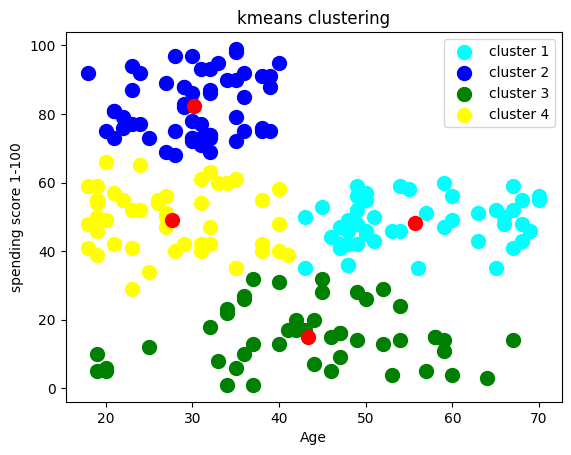

In [21]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0,1], s=100, color = 'cyan', label = "cluster 1")
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1,1], s=100, color = 'blue', label = "cluster 2")
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2,1], s=100, color = 'green', label = "cluster 3")
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3,1], s=100, color = 'yellow', label = "cluster 4")
# plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4,1], s=100, color = 'purple', label = "cluster 5")
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 100, color = "red")
plt.title("kmeans clustering")
# plt.xlabel("Annual Income k$")
plt.xlabel("Age")

plt.ylabel("spending score 1-100")
plt.legend()

plt.show()

# 3D Visualisation

In [22]:
X = dataset.iloc[:, [2,3,4]].values


In [23]:
X[:10]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40],
       [22, 17, 76],
       [35, 18,  6],
       [23, 18, 94],
       [64, 19,  3],
       [30, 19, 72]])

In [24]:
df = pd.DataFrame(X)


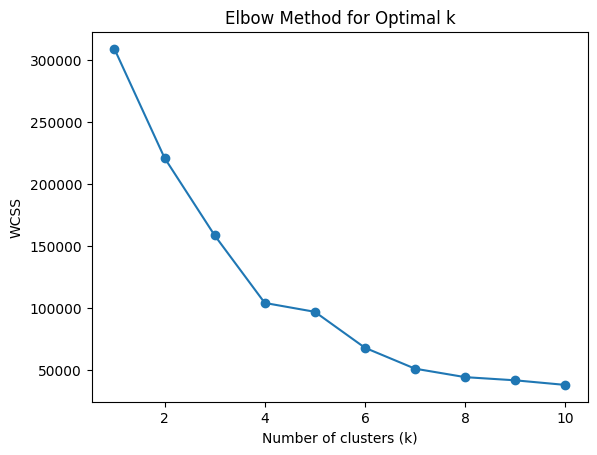

In [25]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init = "k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans3 = KMeans(n_clusters=4, init = "k-means++", random_state=42)
y_kmeans = kmeans3.fit_predict(X)

In [27]:
print(kmeans3.cluster_centers_)

[[44.89473684 48.70526316 42.63157895]
 [32.69230769 86.53846154 82.12820513]
 [24.82142857 28.71428571 74.25      ]
 [40.39473684 87.         18.63157895]]


In [28]:
print(y_kmeans)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


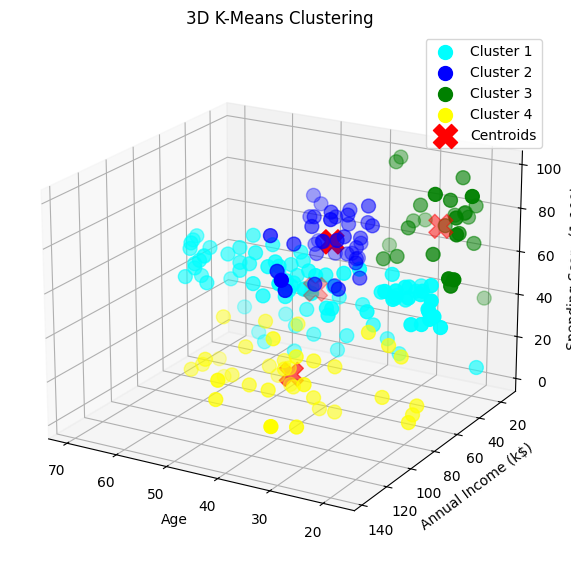

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s=100, c='cyan', label='Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s=100, c='blue', label='Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s=100, c='green', label='Cluster 3')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s=100, c='yellow', label='Cluster 4')
# ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s=100, c='purple', label='Cluster 5')

# Plot centroids
ax.scatter(kmeans3.cluster_centers_[:, 0],
           kmeans3.cluster_centers_[:, 1],
           kmeans3.cluster_centers_[:, 2],
           s=300, c='red', marker='X', label='Centroids')
ax.view_init(elev=20, azim=120)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D K-Means Clustering')
plt.legend()
plt.show()


## Verificam silhouette_score

In [30]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.445342943973765


### 6 Clustere ar fi avut cel mai bun scor (Income vs Spending Score), dar Elbow method (obiectiv) indica 5. In acest caz se poate favoriza individual nr. de clustere.

In [31]:
best_score = -1
best_k = 2
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_k = k

print(best_k, best_score)


6 0.4523443947724053


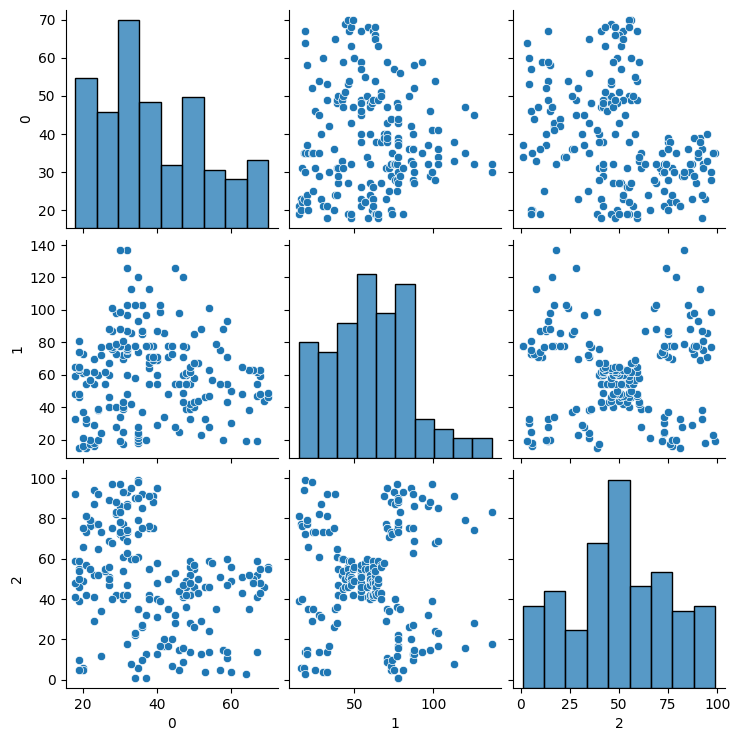

In [40]:
sns.pairplot(df)
plt.show()